In [34]:
import pandas as pd
import datetime

In [35]:
dt = pd.read_csv('C:\\Users\\Admin\\Documents\\Github\\Maga\\datasets\\XRays.csv', delimiter=';')
dt

,stMRN,dtArrive,dtBegin,dtCompleted
0,12222732,4.4.16 8:00,4.4.16 8:04,4.4.16 8:11
1,13510077,4.4.16 8:21,4.4.16 8:26,4.4.16 8:39
2,11183882,4.4.16 8:33,4.4.16 8:44,4.4.16 8:44
3,12949996,4.4.16 8:38,4.4.16 8:41,4.4.16 8:47
4,11566221,4.4.16 8:26,4.4.16 8:33,4.4.16 8:53
...,...,...,...,...
21868,9672860,11.15.16 11:02,11.15.16 11:23,11.15.16 11:43
21869,12075344,11.15.16 13:50,11.15.16 14:01,11.15.16 14:04
21870,12490506,11.15.16 15:43,11.15.16 15:59,11.15.16 16:19
21871,12490506,11.15.16 15:43,11.15.16 15:59,11.15.16 16:19


# Задание 6

In [36]:
dt = dt.drop_duplicates(keep='first')#, subset='stMRN')
dt.shape[0]

21283

In [37]:
dt['dtArrive'] = pd.to_datetime(dt.dtArrive)
dt['dtBegin'] = pd.to_datetime(dt.dtBegin)
dt['dtCompleted'] = pd.to_datetime(dt.dtCompleted)
dt

C:\Users\Admin\AppData\Local\Temp\ipykernel_15460\3790088247.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt['dtArrive'] = pd.to_datetime(dt.dtArrive)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15460\3790088247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['dtArrive'] = pd.to_datetime(dt.dtArrive)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15460\3790088247.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt['dtBegin'] = pd.to_datetime(dt.dtBegin)
C:\U

,stMRN,dtArrive,dtBegin,dtCompleted
0,12222732,2016-04-04 08:00:00,2016-04-04 08:04:00,2016-04-04 08:11:00
1,13510077,2016-04-04 08:21:00,2016-04-04 08:26:00,2016-04-04 08:39:00
2,11183882,2016-04-04 08:33:00,2016-04-04 08:44:00,2016-04-04 08:44:00
3,12949996,2016-04-04 08:38:00,2016-04-04 08:41:00,2016-04-04 08:47:00
4,11566221,2016-04-04 08:26:00,2016-04-04 08:33:00,2016-04-04 08:53:00
...,...,...,...,...
21867,13699907,2016-11-15 11:09:00,2016-11-15 11:16:00,2016-11-15 11:23:00
21868,9672860,2016-11-15 11:02:00,2016-11-15 11:23:00,2016-11-15 11:43:00
21869,12075344,2016-11-15 13:50:00,2016-11-15 14:01:00,2016-11-15 14:04:00
21870,12490506,2016-11-15 15:43:00,2016-11-15 15:59:00,2016-11-15 16:19:00


In [38]:
(dt['dtCompleted'] - dt['dtBegin']).describe()

count                        21283
mean     0 days 00:10:06.235962975
std      0 days 00:47:47.277901719
min              -1 days +22:23:00
25%                0 days 00:05:00
50%                0 days 00:08:00
75%                0 days 00:12:00
max                4 days 17:28:00
dtype: object

In [39]:
dt = dt[(dt['dtCompleted'] - dt['dtBegin'] < datetime.timedelta(hours=1))]

In [40]:
x = dt.dtBegin.unique()
x

<DatetimeArray>
['2016-04-04 08:04:00', '2016-04-04 08:26:00', '2016-04-04 08:44:00',
 '2016-04-04 08:41:00', '2016-04-04 08:33:00', '2016-04-04 09:21:00',
 '2016-04-04 09:18:00', '2016-04-04 09:34:00', '2016-04-04 09:43:00',
 '2016-04-04 10:02:00',
 ...
 '2016-11-15 11:08:00', '2016-11-15 11:02:00', '2016-11-15 11:05:00',
 '2016-11-15 11:10:00', '2016-11-15 11:18:00', '2016-11-15 11:16:00',
 '2016-11-15 11:23:00', '2016-11-15 14:01:00', '2016-11-15 15:59:00',
 '2016-11-16 16:27:00']
Length: 17714, dtype: datetime64[ns]

In [41]:
y = [(x0, dt[(dt['dtBegin'] <= x0) & (dt['dtCompleted'] > x0)].shape[0]) for x0 in x]
d = max(y, key=lambda k: k[1])

In [44]:
d[1]

15

In [43]:
dt[(dt['dtBegin'] <= d[0]) & (dt['dtCompleted'] > d[0])]

,stMRN,dtArrive,dtBegin,dtCompleted
11529,12857795,2016-08-09 10:42:00,2016-08-09 10:58:00,2016-08-09 11:05:00
11530,9294162,2016-08-09 10:38:00,2016-08-09 10:50:00,2016-08-09 11:08:00
11531,9294162,2016-08-09 10:38:00,2016-08-09 10:51:00,2016-08-09 11:09:00
11532,9294162,2016-08-09 10:37:00,2016-08-09 10:51:00,2016-08-09 11:09:00
11533,8284043,2016-08-09 10:22:00,2016-08-09 10:34:00,2016-08-09 11:10:00
11534,8284043,2016-08-09 10:23:00,2016-08-09 10:35:00,2016-08-09 11:10:00
11535,13575471,2016-08-09 10:44:00,2016-08-09 11:00:00,2016-08-09 11:12:00
11536,9742016,2016-08-09 10:40:00,2016-08-09 10:57:00,2016-08-09 11:18:00
11538,8341006,2016-08-09 11:01:00,2016-08-09 11:04:00,2016-08-09 11:20:00
11540,13680290,2016-08-09 10:39:00,2016-08-09 10:51:00,2016-08-09 11:26:00


# Задание 7

In [45]:
x = dt.dtArrive.unique()
x

<DatetimeArray>
['2016-04-04 08:00:00', '2016-04-04 08:21:00', '2016-04-04 08:33:00',
 '2016-04-04 08:38:00', '2016-04-04 08:26:00', '2016-04-04 09:08:00',
 '2016-04-04 09:15:00', '2016-04-04 09:27:00', '2016-04-04 09:22:00',
 '2016-04-04 09:33:00',
 ...
 '2016-11-15 11:03:00', '2016-11-15 10:55:00', '2016-11-15 10:57:00',
 '2016-11-15 11:04:00', '2016-11-15 11:01:00', '2016-11-15 11:09:00',
 '2016-11-15 11:02:00', '2016-11-15 13:50:00', '2016-11-15 15:43:00',
 '2016-11-16 16:20:00']
Length: 19016, dtype: datetime64[ns]

In [48]:
y = [(x0, dt[(dt['dtArrive'] <= x0) & (dt['dtBegin'] > x0)].shape[0]) for x0 in x]
d = max(y, key=lambda k: k[1])

In [49]:
d

(Timestamp('2016-10-13 11:25:00'), 34)

In [50]:
import matplotlib.pyplot as plt

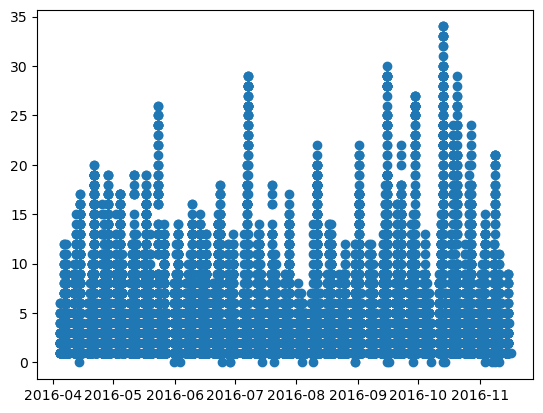

In [54]:
plt.scatter([x0 for x0, y0 in y], [y0 for x0,y0 in y])

In [71]:
st = 7
en = 9
((datetime.time(hour=st) < dt['dtBegin'].dt.time) & (dt['dtBegin'].dt.time < datetime.time(hour=en))).sum()

3053

In [72]:
st = 10
en = 12
((datetime.time(hour=st) < dt['dtBegin'].dt.time) & (dt['dtBegin'].dt.time < datetime.time(hour=en))).sum()

6632

In [73]:
st = 13
en = 15
((datetime.time(hour=st) < dt['dtBegin'].dt.time) & (dt['dtBegin'].dt.time < datetime.time(hour=en))).sum()

4543

In [74]:
st = 14
en = 16
((datetime.time(hour=st) < dt['dtBegin'].dt.time) & (dt['dtBegin'].dt.time < datetime.time(hour=en))).sum()

3355